<a href="https://colab.research.google.com/github/Christian-Divinefavour/Stock-Market-Price-Prediction-using-RNN-and-LSTM-architecture/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#--Description:This program aims at using the Artificial Neural Networks: Recurrent Neural Network and Long Short Term
#              Memory (LSTM) to predict future closing prices of the Brent Oil Commodity using previous stock price from
#              105 months (Dec 2, 2010 to Sept 2, 2019) .

In [ ]:
#-------IMPORT LIBRARIES--------

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
#------------IMPORT THE DATAFRAME-----------

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BRENToil.csv')
df.head()

,Gmt time,Open,High,Low,Close,Volume
0,01.12.2010 22:00:00.000,88.734,90.810,88.390,90.680,10575.0840
1,02.12.2010 22:00:00.000,90.690,91.838,90.086,91.565,18357.7109
2,05.12.2010 22:00:00.000,91.578,91.999,90.836,90.968,22625.6281
3,06.12.2010 22:00:00.000,90.975,92.840,90.695,90.868,15015.8009
4,07.12.2010 22:00:00.000,90.858,91.708,90.128,90.991,17948.3942


# New section

In [ ]:
df.shape

(2212, 6)

In [ ]:
#-----------DISPLAY DATA TYPES---------

In [ ]:
df.dtypes

Gmt time     object
Open        float64
High        float64
Low         float64
Close       float64
Volume      float64
dtype: object

In [ ]:
#----------CONVERT 'GMT TIME' TO DATETIME DATA TYPE---------

In [ ]:
df['Gmt time']=pd.to_datetime(df['Gmt time'])
df.dtypes

Gmt time    datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
Volume             float64
dtype: object

In [ ]:
df.head()

,Gmt time,Open,High,Low,Close,Volume
0,2010-01-12 22:00:00,88.734,90.810,88.390,90.680,10575.0840
1,2010-02-12 22:00:00,90.690,91.838,90.086,91.565,18357.7109
2,2010-05-12 22:00:00,91.578,91.999,90.836,90.968,22625.6281
3,2010-06-12 22:00:00,90.975,92.840,90.695,90.868,15015.8009
4,2010-07-12 22:00:00,90.858,91.708,90.128,90.991,17948.3942


In [ ]:
#------------CLOSING PRICE VISUALIZATION-------------

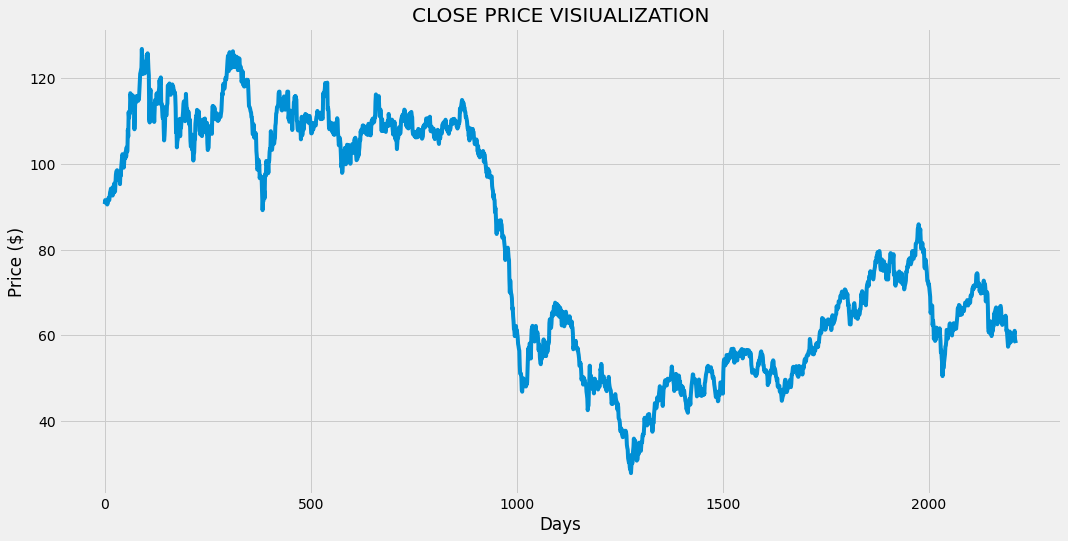

In [ ]:
plt.figure(figsize=(16,8))
plt.title('CLOSE PRICE VISIUALIZATION')
plt.plot(df['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.show()

In [ ]:
c_df = df.filter(['Close'])
data = c_df.values
train_c_df_len = math.ceil(len(data)*.8)
train_c_df_len

1770

In [ ]:
norm = MinMaxScaler(feature_range=(0,1))
norm_data = norm.fit_transform(data)
norm_data

array([[0.63464548],
       [0.64358045],
       [0.63755313],
       ...,
       [0.31515714],
       [0.31051298],
       [0.30647457]])

In [ ]:
norm_df = pd.DataFrame(norm_data, columns=['Normalized Close'])
norm_df.head()

,Normalized Close
0,0.634645
1,0.643580
2,0.637553
3,0.636544
4,0.637785


In [ ]:
comp_norm_df = pd.concat([c_df, norm_df], axis = 1)
comp_norm_df.head()

,Close,Normalized Close
0,90.680,0.634645
1,91.565,0.643580
2,90.968,0.637553
3,90.868,0.636544
4,90.991,0.637785


In [ ]:
train_df = norm_data[0:train_c_df_len,:]

In [ ]:

x_train = []
y_train = []

for i in range(60, len(train_df)):
    x_train.append(train_df[i-60:i, 0])
    y_train.append(train_df[i,0])

In [ ]:
x_train, y_train= np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1710, 60, 1)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(50, return_sequences=True, activation='relu' ,input_shape=(60, 1)))
model.add(tf.keras.layers.LSTM(50, return_sequences=False,))
model.add(tf.keras.layers.Dense(25))
model.add(tf.keras.layers.Dense(1))

In [ ]:
#-------------COMPILE MODEL

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [ ]:
#-------------TRAIN MODEL

In [ ]:
model.fit(x_train, y_train, batch_size=10, epochs=20)

Epoch 1/20
171/171 [==============================] - 8s 32ms/step - loss: 6.5761e-04
Epoch 2/20
171/171 [==============================] - 5s 32ms/step - loss: 2.9971e-04
Epoch 3/20
171/171 [==============================] - 5s 32ms/step - loss: 2.9570e-04
Epoch 4/20
171/171 [==============================] - 5s 32ms/step - loss: 3.0975e-04
Epoch 5/20
171/171 [==============================] - 5s 32ms/step - loss: 3.1563e-04
Epoch 6/20
171/171 [==============================] - 5s 32ms/step - loss: 3.4529e-04
Epoch 7/20
171/171 [==============================] - 6s 32ms/step - loss: 2.7122e-04
Epoch 8/20
171/171 [==============================] - 5s 32ms/step - loss: 2.7952e-04
Epoch 9/20
171/171 [==============================] - 5s 32ms/step - loss: 2.7712e-04
Epoch 10/20
171/171 [==============================] - 5s 32ms/step - loss: 3.7772e-04
Epoch 11/20
171/171 [==============================] - 5s 32ms/step - loss: 4.7053e-04
Epoch 12/20
171/171 [==============================]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#----------CREATE TESTING DATA
#----------ARRAY CONTAINING NORMALIZED VALUES FROM 1710 TO 1770

In [ ]:
test_df = norm_data[train_c_df_len - 60:, :]

In [ ]:
test_df

array([[0.29223919],
       [0.31616675],
       [0.31010914],
       [0.30107321],
       [0.29885208],
       [0.29143151],
       [0.28502055],
       [0.2813355 ],
       [0.28189078],
       [0.29410696],
       [0.2798211 ],
       [0.28093166],
       [0.28961423],
       [0.29072479],
       [0.28835223],
       [0.29617664],
       [0.30344577],
       [0.30561641],
       [0.30642409],
       [0.29688336],
       [0.30294097],
       [0.29769104],
       [0.30925098],
       [0.30874618],
       [0.31959939],
       [0.32974588],
       [0.33403669],
       [0.33560157],
       [0.32939252],
       [0.33206797],
       [0.34554614],
       [0.36563721],
       [0.36043776],
       [0.35988248],
       [0.36301225],
       [0.36089208],
       [0.356046  ],
       [0.33863037],
       [0.34352694],
       [0.33847893],
       [0.35195711],
       [0.34660623],
       [0.35180567],
       [0.35801472],
       [0.3590748 ],
       [0.36230553],
       [0.36230553],
       [0.358

In [ ]:
#-------------CREATE X-TEST Y-TEST

In [ ]:
x_test = []
y_test = data[train_c_df_len:, :]
for i in range (60, len(test_df)):
  x_test.append(test_df[i-60:i, 0])

In [ ]:
#-----------CONVERT TO NP ARRAY
x_test = np.array(x_test)

In [ ]:
#---------------RESHAPE THE DATA
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1] , 1))

In [ ]:
x_test

array([[[0.29223919],
        [0.31616675],
        [0.31010914],
        ...,
        [0.36346657],
        [0.35155327],
        [0.35887288]],

       [[0.31616675],
        [0.31010914],
        [0.30107321],
        ...,
        [0.35155327],
        [0.35887288],
        [0.35740896]],

       [[0.31010914],
        [0.30107321],
        [0.29885208],
        ...,
        [0.35887288],
        [0.35740896],
        [0.35927672]],

       ...,

       [[0.35786328],
        [0.34857495],
        [0.3456471 ],
        ...,
        [0.32595988],
        [0.3291906 ],
        [0.33545013]],

       [[0.34857495],
        [0.3456471 ],
        [0.32303203],
        ...,
        [0.3291906 ],
        [0.33545013],
        [0.31515714]],

       [[0.3456471 ],
        [0.32303203],
        [0.33787317],
        ...,
        [0.33545013],
        [0.31515714],
        [0.31051298]]])

In [ ]:
#------------GET THE MODELS PREDICTED PRICE VALUE

In [ ]:
predictions = model.predict(x_test)
predictions = norm.inverse_transform(predictions)

In [ ]:
#---------GET ROOT MEAN SQUARED ERROR

In [ ]:
rmse = np.sqrt((predictions - y_test)**2).mean()
print(rmse)

1.092969922441163


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


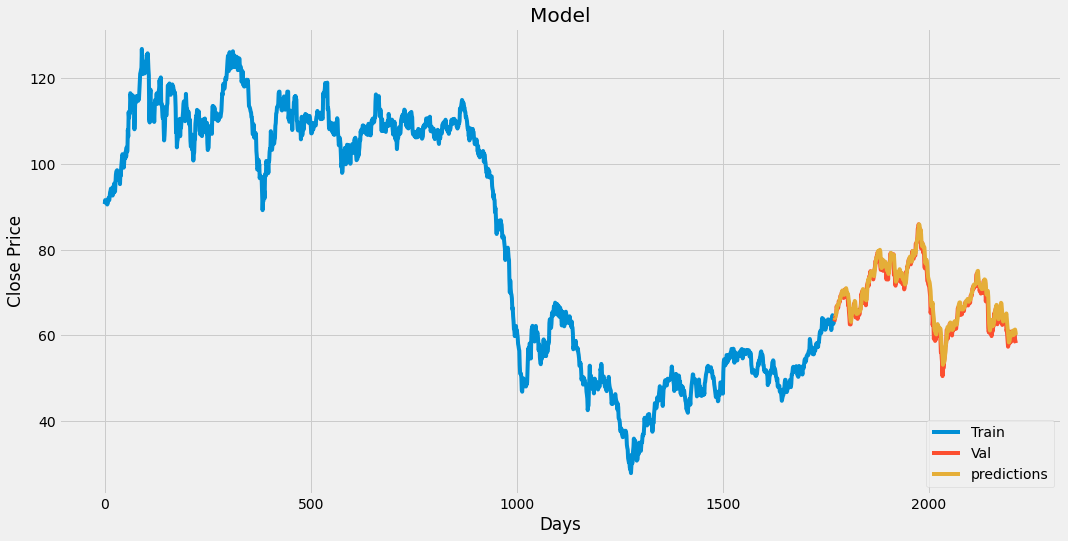

In [ ]:
#plot the data
train = c_df[:train_c_df_len]
valid = c_df[train_c_df_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show()

In [ ]:
#show the valid predicted prices
valid

,Close,Predictions
1770,63.220,64.139465
1771,63.405,64.010071
1772,63.810,64.023026
1773,64.480,64.245049
1774,64.725,64.726593
...,...,...
2207,60.425,60.282677
2208,61.045,60.731606
2209,59.035,61.337021
2210,58.575,60.857006


In [ ]:
quote= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BRENToil.csv')

In [ ]:
new_df = quote.filter(['Close'])

In [ ]:

new_df

,Close
0,90.680
1,91.565
2,90.968
3,90.868
4,90.991
...,...
2207,60.425
2208,61.045
2209,59.035
2210,58.575


In [ ]:
last_100_days = new_df[-100:].values

In [ ]:
last_100_days

array([[71.835],
       [71.585],
       [71.925],
       [74.095],
       [74.375],
       [74.495],
       [74.265],
       [71.565],
       [71.945],
       [71.625],
       [72.105],
       [70.325],
       [70.775],
       [71.345],
       [69.745],
       [70.205],
       [70.195],
       [70.725],
       [69.895],
       [70.845],
       [71.885],
       [72.765],
       [72.065],
       [72.045],
       [71.995],
       [70.795],
       [67.915],
       [69.195],
       [69.985],
       [70.085],
       [69.65 ],
       [66.66 ],
       [61.665],
       [60.775],
       [61.425],
       [60.545],
       [62.265],
       [63.265],
       [62.345],
       [62.055],
       [59.815],
       [61.285],
       [62.025],
       [60.955],
       [62.225],
       [62.195],
       [64.505],
       [65.265],
       [64.745],
       [65.785],
       [66.205],
       [66.505],
       [64.385],
       [65.185],
       [62.575],
       [63.865],
       [63.145],
       [64.395],
       [63.915

In [ ]:
last_100_days_norm = norm.transform(last_100_days)
X_test = []
X_test.append(last_100_days_norm)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)

pred_price = norm.inverse_transform(pred_price)
print(pred_price)

[[59.384132]]


In [ ]:
pred = pd.DataFrame(pred_price, columns = ['Close'])
pred

,Close
0,59.384132


In [ ]:
new_df1 = new_df.append(pred, ignore_index=True)
new_df1

,Close
0,90.680000
1,91.565000
2,90.968000
3,90.868000
4,90.991000
...,...
2208,61.045000
2209,59.035000
2210,58.575000
2211,58.175000


In [ ]:
last_100_days = new_df1[-100:].values
last_100_days_norm = norm.transform(last_100_days)
X_test = []
X_test.append(last_100_days_norm)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price1 = model.predict(X_test)

pred_price1 = norm.inverse_transform(pred_price1)
print(pred_price1)

[[59.506382]]


In [ ]:
pred1 = pd.DataFrame(pred_price1, columns=['Close'])
pred = pred.append(pred1, ignore_index=True)
new_df2 = new_df.append(pred, ignore_index=True)

last_100_days = new_df2[-100:].values
last_100_days_norm = norm.transform(last_100_days)
X_test = []
X_test.append(last_100_days_norm)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price2 = model.predict(X_test)

pred_price2 = norm.inverse_transform(pred_price2)
print(pred_price2)

[[59.857906]]


In [ ]:
pred2 = pd.DataFrame(pred_price2, columns=['Close'])
pred = pred.append(pred2, ignore_index=True)
new_df3 = new_df.append(pred, ignore_index=True)

last_100_days = new_df3[-100:].values
last_100_days_norm = norm.transform(last_100_days)
X_test = []
X_test.append(last_100_days_norm)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price3 = model.predict(X_test)

pred_price3 = norm.inverse_transform(pred_price3)
print(pred_price3)

[[60.29944]]


In [ ]:
pred3 = pd.DataFrame(pred_price3, columns=['Close'])
pred = pred.append(pred3, ignore_index=True)
new_df4 = new_df.append(pred, ignore_index=True)

last_100_days = new_df4[-100:].values
last_100_days_norm = norm.transform(last_100_days)
X_test = []
X_test.append(last_100_days_norm)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price4 = model.predict(X_test)

pred_price4 = norm.inverse_transform(pred_price4)
print(pred_price4)

[[60.78772]]


In [ ]:
pred4 = pd.DataFrame(pred_price4, columns=['Close'])
pred = pred.append(pred4, ignore_index=True)
pred

,Close
0,59.384132
1,59.506382
2,59.857906
3,60.299438
4,60.787720


In [ ]:
df.tail()

,Gmt time,Open,High,Low,Close,Volume
2207,2019-08-27 21:00:00,59.988,60.971,59.785,60.425,2711.7090
2208,2019-08-28 21:00:00,60.438,61.165,59.971,61.045,3825.6670
2209,2019-08-29 21:00:00,60.305,60.595,58.500,59.035,13420.6841
2210,2019-01-09 21:00:00,58.805,59.235,58.075,58.575,4235.2330
2211,2019-02-09 21:00:00,58.448,58.846,57.205,58.175,4221.8670
